(0.0, 6.0, 0.0, 20.0)

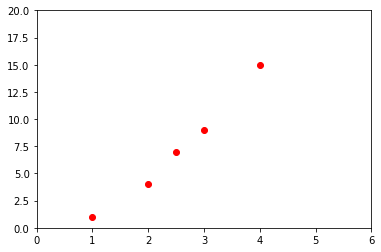

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.scatter(x, y, color='r')
plt.axis([0, 6, 0, 20])

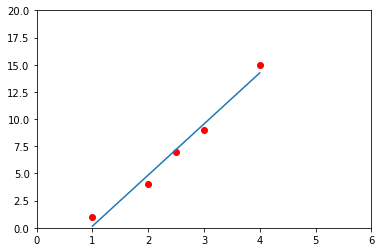

In [3]:
plt.scatter(x, y, c='r')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [4]:
from __future__ import print_function, absolute_import, division, unicode_literals

In [5]:
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

In [6]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # x_train
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # x_test

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [7]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [8]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [9]:
dfeval.shape

(264, 9)

In [10]:
print(dftrain.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [11]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<AxesSubplot:>

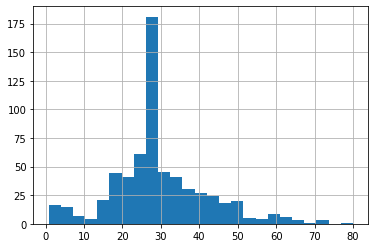

In [14]:
dftrain.age.hist(bins=25)

<AxesSubplot:>

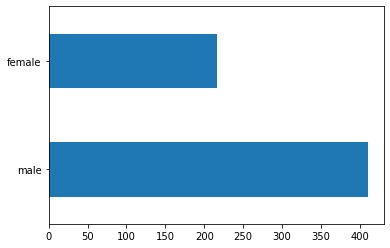

In [16]:
dftrain.sex.value_counts().plot(kind = 'barh')

<AxesSubplot:>

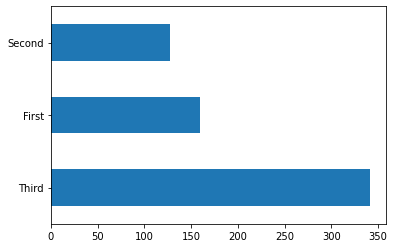

In [17]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, 'survival rate')

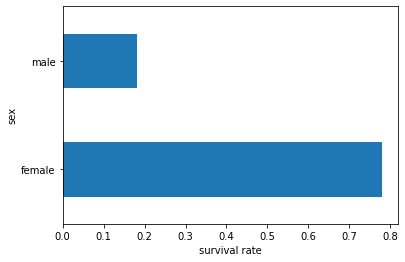

In [18]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('survival rate')

In [19]:
CATEGORICAL_COLUMNS = ['sex', 'parch', 'deck', 'n_siblings_spouses','class', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = [] #create a new list for the changed columns

for feature_name in CATEGORICAL_COLUMNS:
    vocab = dftrain[feature_name].unique() #extracts a list of the unique values of the given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))
    
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [20]:
def make_input_fn(data_df, label_df, num_epochs = 10, batch_size = 32, shuffle = True):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(100) # randomize order of feeding data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for no. of epochs
        
        return ds # return batch of dataset
    
    return input_function # return object of the function 


train_input_fn = make_input_fn(dftrain, y_train)

eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs = 1, shuffle = False)

In [21]:
lr_model = tf.estimator.LinearClassifier(feature_columns = feature_columns)
# create a linear estimtor by passing the feature columns created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sanjay\\AppData\\Local\\Temp\\tmpgpws_1fm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#training
lr_model.train(train_input_fn)
#testing
acc_result = lr_model.evaluate(eval_input_fn)

clear_output() # clear console output
print(acc_result['accuracy']) #  # the acc_result variable is simply a dict of stats about our model

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


D:\Anaconda3\envs\tf2.5\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.


In [27]:
pred_dicts = list(lr_model.predict(eval_input_fn))
survival_probability = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sanjay\AppData\Local\Temp\tmp5nyj04rt\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'Predicted probabilities'}, ylabel='Frequency'>

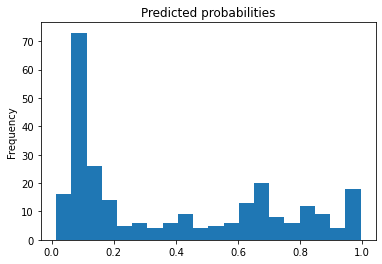

In [30]:
survival_probability.plot(kind = 'hist', bins = 20, title = 'Predicted probabilities')